In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils import sph2cart
from plotting import set_axes_equal, set_defense_context, draw_unit_cube

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
# generate coordinates of a sphere
r = 5
theta = np.linspace(0, 2 * np.pi, 301)
phi = np.linspace(0, np.pi, 301)
Theta, Phi = np.meshgrid(theta, phi)
x, y, z = sph2cart(r, Theta.ravel(), Phi.ravel())
xyz = np.c_[x, y, z]

In [4]:
# create 2 exp patterns
mask = np.where(xyz[:, 0] > 0)[0]
y = xyz[mask, 1]
z = xyz[mask, 2]
center_1 = [-0.5, 2]
radius_1 = 0.5
region_1 = np.sqrt(((y - center_1[0]) / 1.5) ** 2 + (z - center_1[1]) ** 2)
color_1 = 15.1 * np.exp(-(region_1 / radius_1) ** 2)

center_2 = [2.5, -1]
radius_2 = 1.5
region_2 = np.sqrt((y - center_2[0]) ** 2 + (z - center_2[1]) ** 2)
color_2 = 10 * np.exp(-(region_2 / radius_2) ** 2)

color = color_1 + color_2
xyzc = np.column_stack((xyz, np.zeros((xyz.shape[0], 1))))
xyzc[mask, 3] = color

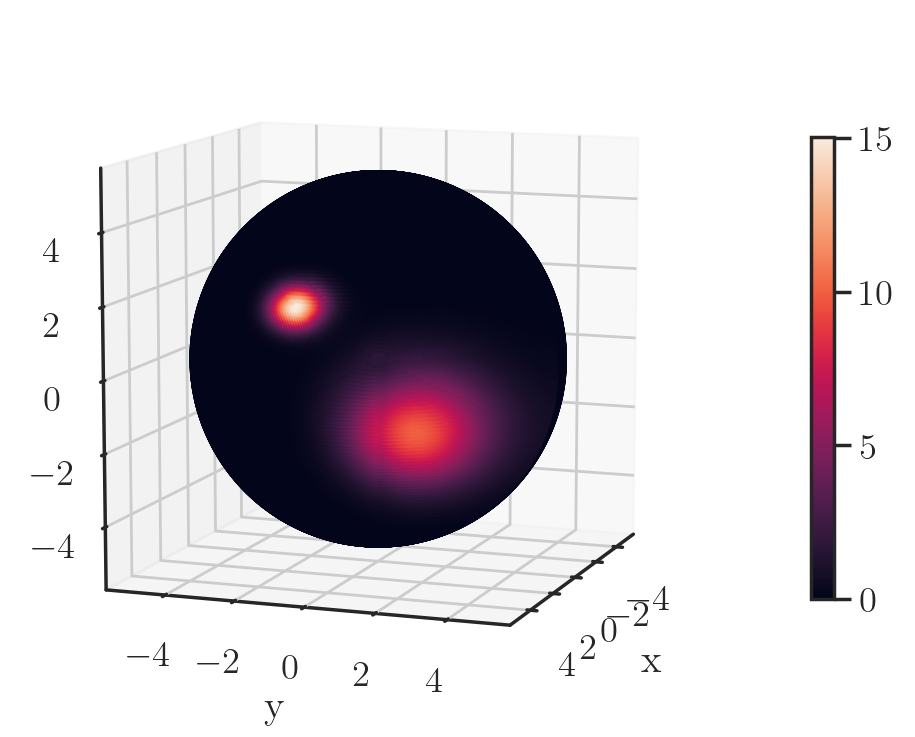

In [5]:
# visualize
with set_defense_context():
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes(projection ='3d')
    s = ax.scatter(*xyz.T, c=xyzc[:, 3])
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.view_init(10, 20)
    ax.set_box_aspect([1, 1, 1])
    fig.colorbar(s, ax=ax, pad=0.1, shrink=0.5)
    plt.show()

In [ ]:
# automatic detection algorithm
# tba